In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/customer-churn.csv')

In [ ]:
df.head()

,ID,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Plan,Status,Age,Customer Value,Churn
0,1,3,no,10,2,1603,25,32,11,3,pre-paid,active,30,193.120,no
1,2,8,no,37,0,4255,65,0,13,2,pre-paid,active,25,194.400,yes
2,3,0,no,38,0,0,0,0,0,2,pre-paid,not-active,25,0.000,yes
3,4,10,no,36,0,2338,54,327,20,2,pre-paid,active,25,1579.140,yes
4,5,10,no,37,0,4083,60,0,31,1,pre-paid,active,15,227.865,yes


In [ ]:
df.describe()

,ID,Call Failure,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Age,Customer Value
count,3150.000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,1575.500,7.627937,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,30.998413,470.972916
std,909.471,7.263886,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,8.831095,517.015433
min,1.000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,0.000000
25%,788.250,1.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,25.000000,113.801250
50%,1575.500,6.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,30.000000,228.480000
75%,2362.750,12.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,30.000000,788.388750
max,3150.000,36.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,55.000000,2165.280000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       3150 non-null   int64  
 1   Call Failure             3150 non-null   int64  
 2   Complains                3150 non-null   object 
 3   Subscription  Length     3150 non-null   int64  
 4   Charge Amount            3150 non-null   int64  
 5   Seconds of Use           3150 non-null   int64  
 6   Freq. of use             3150 non-null   int64  
 7   Freq. of SMS             3150 non-null   int64  
 8   Distinct Called Numbers  3150 non-null   int64  
 9   Age Group                3150 non-null   int64  
 10  Plan                     3150 non-null   object 
 11  Status                   3150 non-null   object 
 12  Age                      3150 non-null   int64  
 13  Customer Value           3150 non-null   float64
 14  Churn                   

In [ ]:
df.shape

(3150, 16)

In [ ]:
df['Churn_encoded'] = df['Churn'].apply(lambda x: 1 if x == 'yes' else 0)

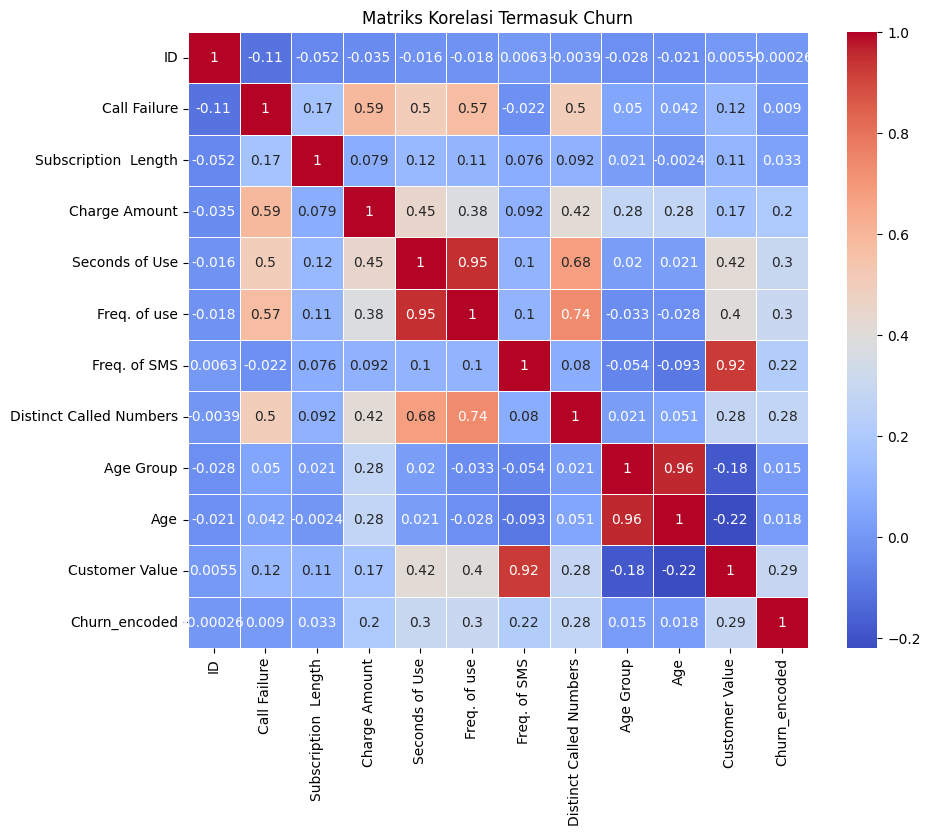

In [ ]:
# Matriks korelasi
correlation = df.select_dtypes(include=np.number).corr() # Select only numerical columns for correlation calculation

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriks Korelasi Termasuk Churn')
plt.show()

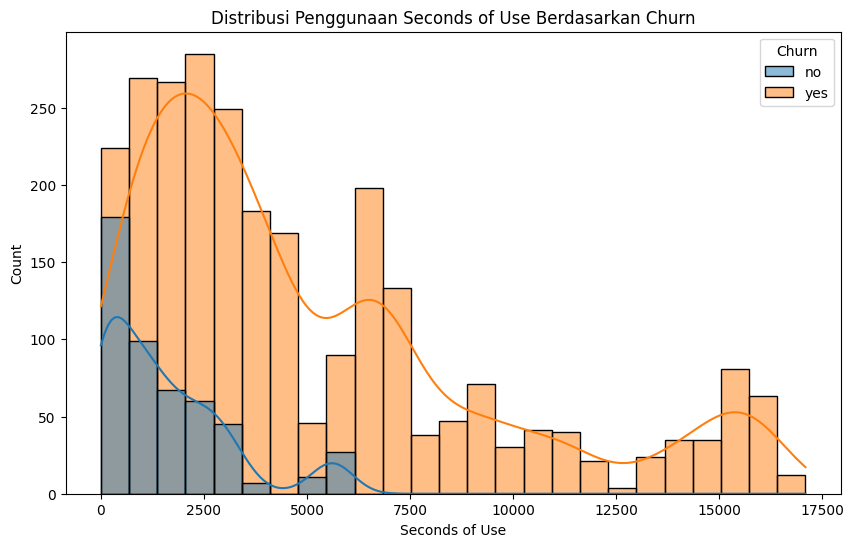

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Seconds of Use', hue='Churn', kde=True)
plt.title('Distribusi Penggunaan Seconds of Use Berdasarkan Churn')
plt.show()

In [ ]:
churn_counts = df['Churn'].value_counts()
print("Distribusi Churn:")
print(churn_counts)

Distribusi Churn:
Churn
yes    2655
no      495
Name: count, dtype: int64


In [ ]:
age_distribution = df['Age'].value_counts().sort_index()
print("Distribusi Usia Pelanggan:")
print(age_distribution)

Distribusi Usia Pelanggan:
Age
15     123
25    1037
30    1425
45     395
55     170
Name: count, dtype: int64


In [ ]:
average_customer_value = df['Customer Value'].mean()
median_customer_value = df['Customer Value'].median()
print(f"Rata-rata Customer Value: {average_customer_value}")
print(f"Median Customer Value: {median_customer_value}")

Rata-rata Customer Value: 470.9729158730159
Median Customer Value: 228.48


In [ ]:
# Rata-rata Call Failure berdasarkan Age Group
call_failure_stats_age_group = df.groupby('Age Group')['Call Failure'].mean()
print("Rata-rata Call Failure Berdasarkan Age Group:")
print(call_failure_stats_age_group)


Rata-rata Call Failure Berdasarkan Age Group:
Age Group
1     7.983740
2     7.149470
3     7.888421
4     6.468354
5    10.800000
Name: Call Failure, dtype: float64


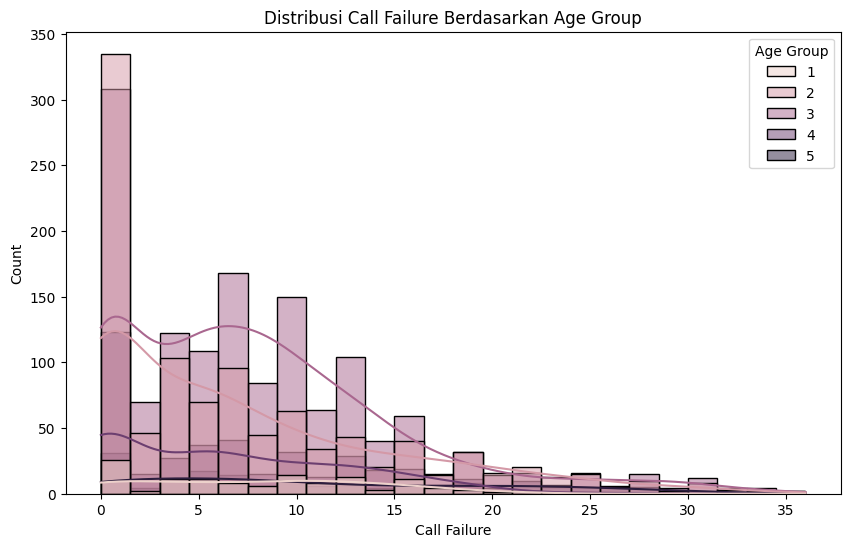

In [ ]:
# Visualisasi Call Failure berdasarkan Age Group
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Call Failure', hue='Age Group', kde=True)
plt.title('Distribusi Call Failure Berdasarkan Age Group')
plt.show()

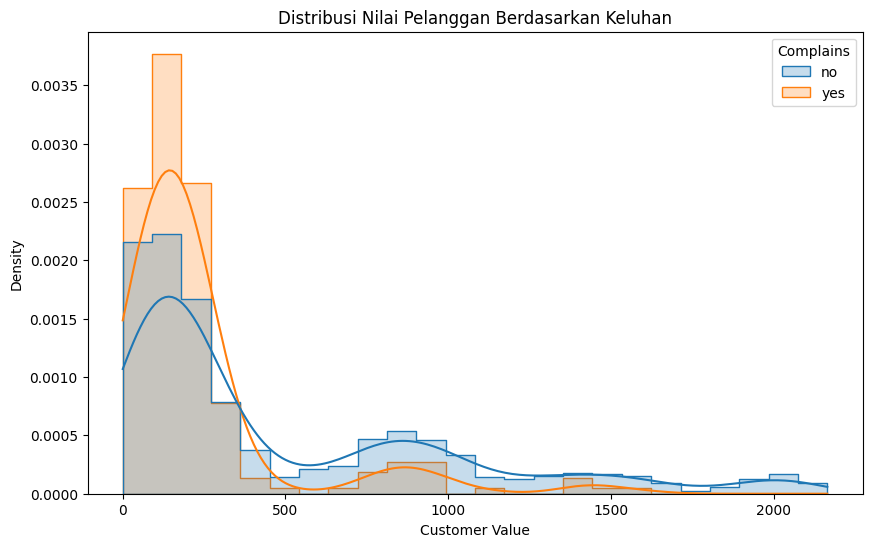

In [ ]:
# Visualisasi Customer Value dengan Histogram berdasarkan Complains
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Customer Value', hue='Complains', kde=True, element="step", stat="density", common_norm=False)
plt.title('Distribusi Nilai Pelanggan Berdasarkan Keluhan')
plt.xlabel('Customer Value')
plt.ylabel('Density')
plt.show()